# Title : Telecom Customer Churn

Aim : To predict the behaviour of customers in order to retain them.      
     In short, Analyze the data and use machile learning techniques in order to prevent the loss of clients/customers for      telecom industry 

Definition : (Source : Investopedia)        
The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period

Import Necessary Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Read the data
data = pd.read_csv(r"C:\Users\kulka\OneDrive\Desktop\Projects\Churn Prediction\datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [113]:
data.shape

(7043, 21)

1. Data consist of 7043 records with 21 features.
2. It is observed that there are around 11 records in "Total charges" column having space values.Hence these are replaced by Nan values and later on removed as they are very less in number. 

In [114]:
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

In [115]:
data.dropna(inplace = True)

In [116]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [117]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

'nunique' is used to see how many unique values each feature has.
It will be easy to plot and analyze each feature based on unique values.

In [118]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis 

In [119]:
# Variables and their unique values for analysis
for item in data.columns:
    print(item," : ", data[item].unique())

customerID  :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electroni

From above, we can say that Features such as ( MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV') have multiple values as 'No Internet Service or No Phone Service' instead of 'NO'.
Hence these are replaced by 'No' for better analysis.

In [120]:
data['MultipleLines'].replace(to_replace = 'No phone service',value = 'No',inplace = True)

replace_columns = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']
for i in replace_columns:
    data[i].replace(to_replace = 'No internet service',value = 'No',inplace = True)

In [121]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Exploring Individual Features

In [122]:
def plot_feature(feature):
    ax = sns.countplot(x = feature,data = data)
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100),
            ha="center")     
    plt.title("Customer Distribution by {}".format(feature)) 
    plt.show()

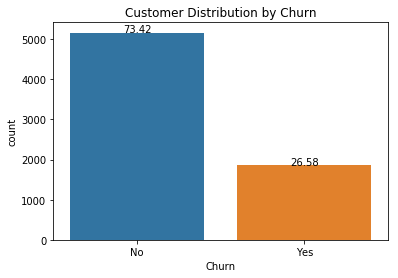

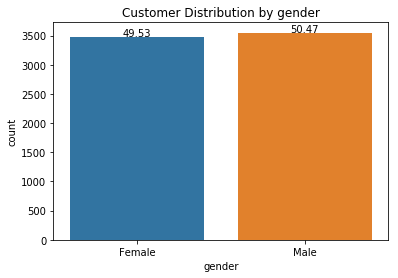

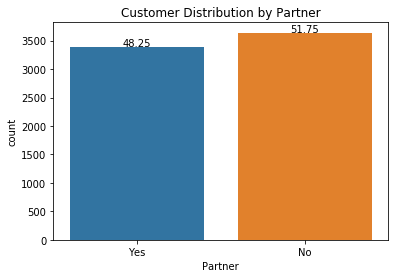

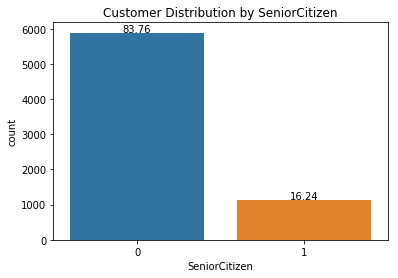

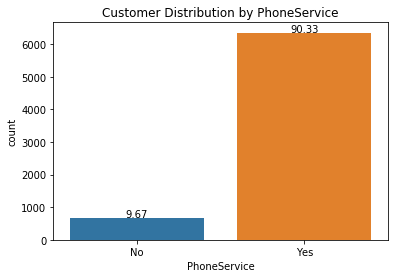

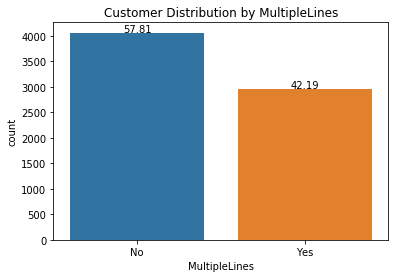

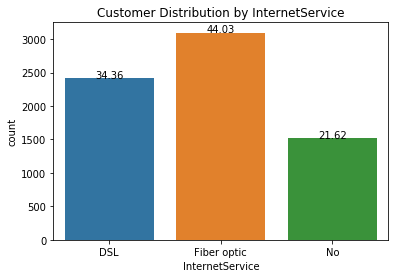

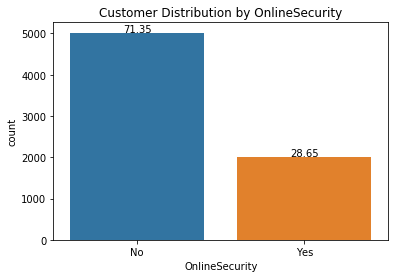

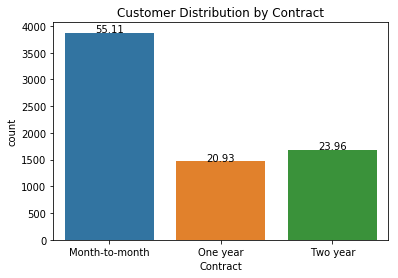

In [123]:
plot_feature('Churn')
plot_feature('gender')
plot_feature('Partner')
plot_feature('SeniorCitizen')
plot_feature('PhoneService')
plot_feature('MultipleLines')
plot_feature('InternetService')
plot_feature('OnlineSecurity')
plot_feature('Contract')

Observations :
    1. Distribution of Customers by Churn 
        73% - No and  27% - Yes
    2. There are equal number of male and female customers(50-50%)
    3. 48% customers have partners while 52% don't have
    4. There are less number of senior citizens(around 16 %) while majority of the people are young(84%)
    5. 10% people do not have Phone Service
    6. Distribution of Customers by Multiple Lines 
        58% - No and 42% - Yes
    7. Distribution of Customers by Internet Service 
        a. 34% - DSL 
        b. 44% - Fiber Optic Service
        c. 22% - No Internet Service
    8. Distribution of Customers by Online Security 
        71% - No and 29 % Yes
    9. Distribution of Customers by Contract
        a. 55% - Month to Month 
        b. 21% - One Year Contract
        c. 24% - Two Year Contract

Exploring Features with respect to Churn

In [124]:
def plot_bar(d,var1,var2):
    grp = d.groupby(var1)[var2].value_counts()
    grp.unstack().plot(kind = 'bar')
    plt.xlabel(var1)
    plt.ylabel("Count of Churn Customers")
    plt.title("Churn Customer Distribution by {}".format(var1)) 

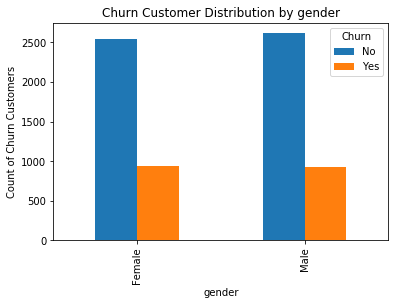

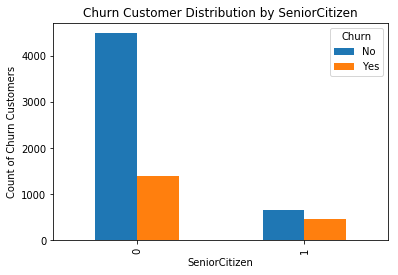

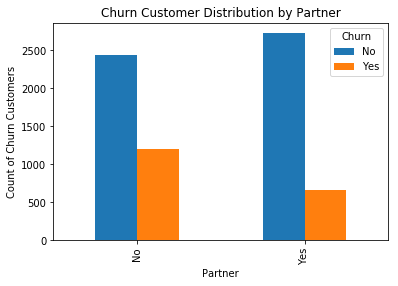

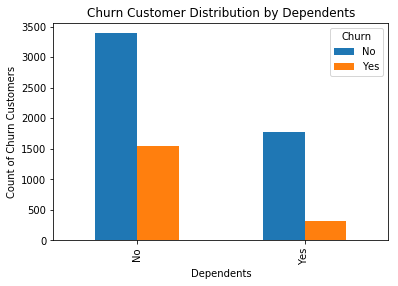

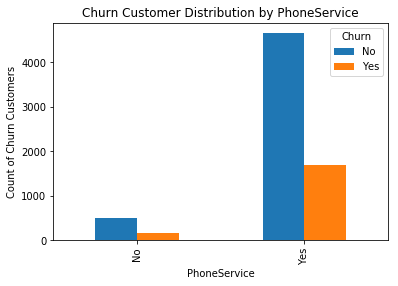

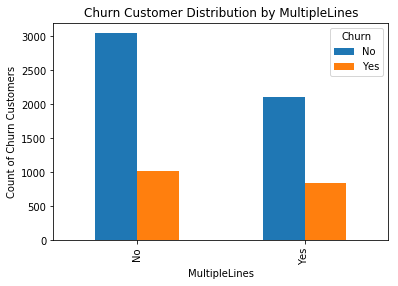

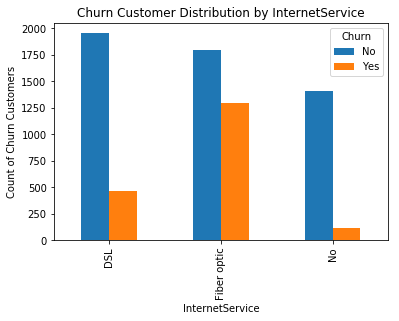

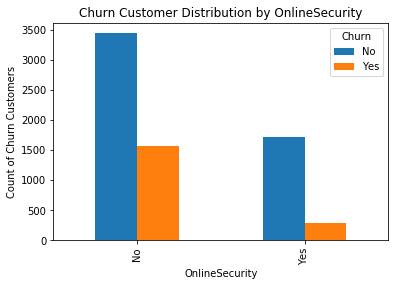

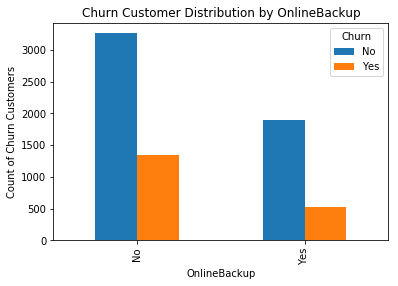

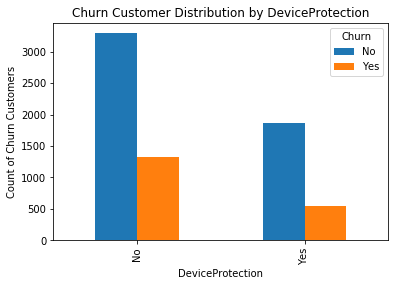

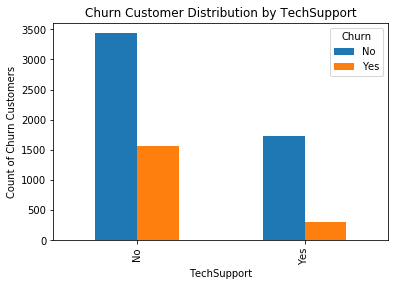

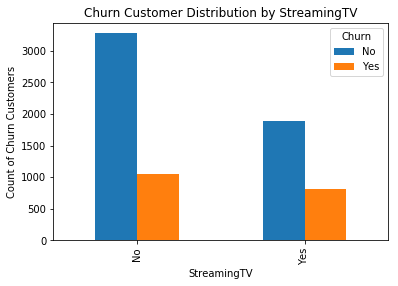

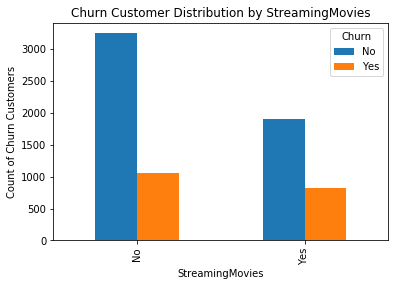

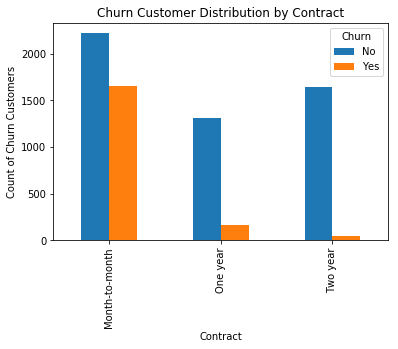

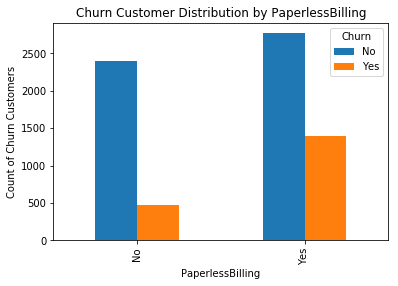

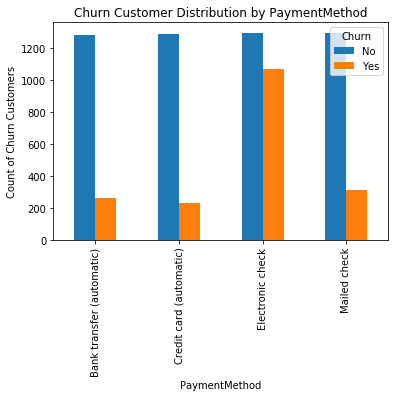

In [125]:
plot_bar(data,'gender','Churn');
plot_bar(data,'SeniorCitizen','Churn');
plot_bar(data,'Partner','Churn');
plot_bar(data,'Dependents','Churn');
plot_bar(data,'PhoneService','Churn');
plot_bar(data,'MultipleLines','Churn');
plot_bar(data,'InternetService','Churn');
plot_bar(data,'OnlineSecurity','Churn');
plot_bar(data,'OnlineBackup','Churn');
plot_bar(data,'DeviceProtection','Churn');
plot_bar(data,'TechSupport','Churn');
plot_bar(data,'StreamingTV','Churn');
plot_bar(data,'StreamingMovies','Churn');
plot_bar(data,'Contract','Churn');
plot_bar(data,'PaperlessBilling','Churn');
plot_bar(data,'PaymentMethod','Churn');

Observations :
    1. Churn rate is almost same for both male and female customers
    2. There are high number of churn customers who are not senior citizens in number, but if we see there are less number         of Senior citizens.Hence when compared with total Senior citizen, Churn rate is higher for SeniorCitizen as compared to Young People
    3. The Customers who don't have partners as well as no dependents have higher churn rate
    4. Customers having Phone service have higher chances of Churn while those who don't phone seervice , they have minimal chances of churn
    5. Customers with Internet Service type as "Fiber Optic" have higher chances of churn
    6. Customers who don't have TechSupport have higher churn rate
    7. Month Month Contract cutomers have a very high Churn Rate
    8. Cutomers having Paperless billing have higher Churn Rate
    9. Customers with Electronic Check have more churn than any other payment methods
    10.MultipleLines, StreamingTV, StreamingMovies have not much effect on Churn

Text(0.5, 1.0, 'Distribution of Customers by tenure')

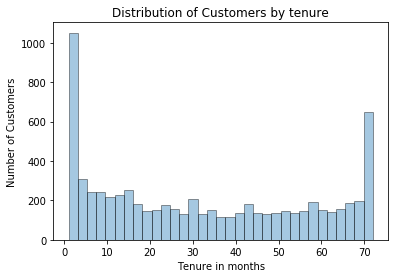

In [126]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(200/6), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Distribution of Customers by tenure')

It is clear that customers having one or two month tenure(New Customers to Service) have higher Churn Rate 

In [127]:
def tenure_count(row):
    if row['tenure'] <= 12 :
        return 'tenure_0-12'
    elif (row['tenure'] > 12 and row['tenure'] <= 24):
        return 'tenure_12-24'
    elif (row['tenure'] > 42 and row['tenure'] <= 36):
        return 'tenure_24-36'
    elif (row['tenure'] > 36 and row['tenure'] <= 48):
        return 'tenure_36-48'
    elif (row['tenure'] > 48 and row['tenure'] <= 60):
        return 'tenure_48-60'
    else:
        return 'tenure_60+'
    
data['grp_tenure'] = data.apply(tenure_count,axis = 1)
data['grp_tenure'].value_counts()

tenure_60+      2239
tenure_0-12     2175
tenure_12-24    1024
tenure_48-60     832
tenure_36-48     762
Name: grp_tenure, dtype: int64

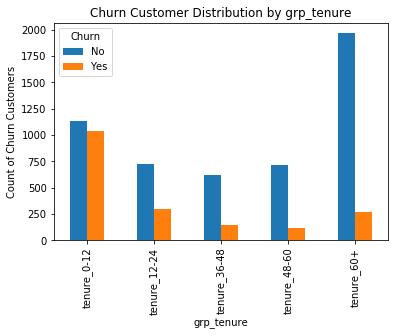

In [128]:
plot_bar(data,'grp_tenure','Churn')

1. There are large number of customers  with tenure greater than 60 months and also they have less Churn Rate as compared to count
2. There are around 90% chances that customers with tenure less than 12 months will left the service.(High Churn)


In [129]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

Text(0.5, 1.0, 'Ralation between Monthly and Total Charges')

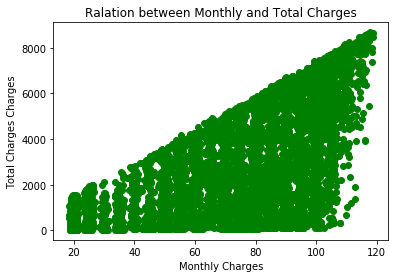

In [130]:
plt.scatter(x = data['MonthlyCharges'],y = data['TotalCharges'],c = 'green')
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges Charges")
plt.title("Ralation between Monthly and Total Charges")

As monthly charge increases,Total Charge also increases.

C:\Users\kulka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Monthly charges by churn')

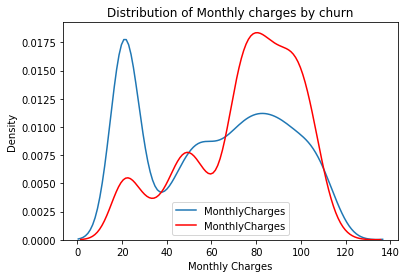

In [131]:
ax = sns.kdeplot(data[data['Churn'] == 'No']['MonthlyCharges'])
ax = sns.kdeplot(data[data['Churn'] == 'Yes']['MonthlyCharges'],color = 'Red')
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')
ax.set_title('Distribution of Monthly charges by churn')

from the above graph in red line, As monthlly charges increases, there is higher probability of Churn

Text(0.5, 1.0, 'Distribution of Total charges by churn')

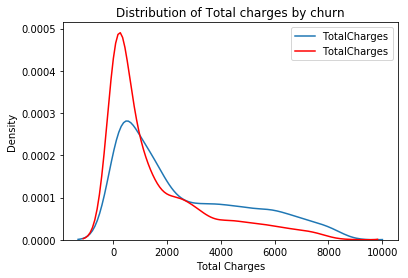

In [132]:
ax = sns.kdeplot(data[data['Churn'] == 'No']['TotalCharges'])
ax = sns.kdeplot(data[data['Churn'] == 'Yes']['TotalCharges'],color = 'Red')
ax.set_xlabel('Total Charges')
ax.set_ylabel('Density')
ax.set_title('Distribution of Total charges by churn')

from the above graph in red line, Churn Rate is Higher when Total charges are on lower side

Converting Categorical values into Numerical

Label Encoding: I used Label encoding.We can also use One hot encoding 

In [134]:
data.drop(['customerID'],axis = 1,inplace = True)

In [135]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'grp_tenure'],
      dtype='object')


In [136]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
gender              7032 non-null int32
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int32
Dependents          7032 non-null int32
tenure              7032 non-null int64
PhoneService        7032 non-null int32
MultipleLines       7032 non-null int32
InternetService     7032 non-null int32
OnlineSecurity      7032 non-null int32
OnlineBackup        7032 non-null int32
DeviceProtection    7032 non-null int32
TechSupport         7032 non-null int32
StreamingTV         7032 non-null int32
StreamingMovies     7032 non-null int32
Contract            7032 non-null int32
PaperlessBilling    7032 non-null int32
PaymentMethod       7032 non-null int32
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int32
grp_tenure          7032 non-null int32
dtypes: float64(2), int32(17), int64(2)
memory us

In [137]:
y = data['Churn']
data.drop(['Churn'],axis = 1, inplace = True)
Train_x = data

In [138]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(Train_x)

# Implement Machine Learning Algorithms

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


Logistic Regression

In [141]:
LR = LogisticRegression(solver = 'liblinear')
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
LR_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using LR : ", LR_Score)

Accuracy Using LR :  0.8071672354948806


In [142]:
#Weights of the Variables
pd.Series(LR.coef_[0],index = Train_x.columns.values)

gender              0.018496
SeniorCitizen       0.116553
Partner             0.036896
Dependents         -0.099628
tenure             -1.326534
PhoneService       -0.372384
MultipleLines       0.056150
InternetService    -0.010654
OnlineSecurity     -0.239626
OnlineBackup       -0.183716
DeviceProtection   -0.043230
TechSupport        -0.273354
StreamingTV        -0.056065
StreamingMovies    -0.038151
Contract           -0.596462
PaperlessBilling    0.207134
PaymentMethod       0.045846
MonthlyCharges      0.955869
TotalCharges        0.632514
grp_tenure         -0.111357
dtype: float64

It seems Total Charges,Monthly charges are positively related to churn while Tenure,Phone Service,Contract are negatively related to Churn rate .All these are important factors while deciding churn rate based on their weights


Random Forest

In [144]:
RF = RandomForestClassifier(n_estimators=600,max_features=15,
                            n_jobs = -1,random_state=0,
                            min_samples_leaf=50,oob_score=True,
                            max_leaf_nodes=30 )
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
RF_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using RF  : ", RF_Score)

Accuracy Using RF  :  0.8020477815699659


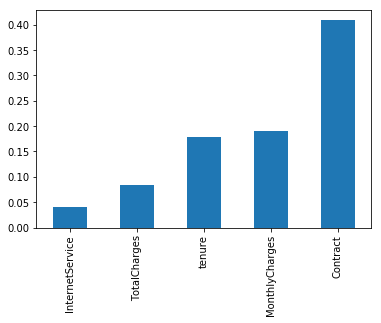

In [148]:
imp_features = pd.Series(RF.feature_importances_,index = Train_x.columns.values)
imp_features.sort_values()[-5:].plot(kind = 'bar')

Top five Important featues using Random Forest
1. Contract
2. Monthly Charges
3. Tenure
4. Total Charges
5. Internet Service

These features have also high weightage by Logistic Regression. Hence,We can conclude that,these features should be considered while deciding Churn 

Support Vector Machines

In [149]:
SVM = SVC(kernel='rbf',C =1) 
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
SVM_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using SVM  : ", SVM_Score)

C:\Users\kulka\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Using SVM  :  0.8043230944254836


In [ ]:
labels = ['Churn', 'Not-Churn']
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not-Churn', 'Churn']); ax.yaxis.set_ticklabels(['Not-Churn', 'Churn']);

Gaussian Naive Bayes

In [150]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
GB_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using Gaussian Regression : ", GB_Score)

Accuracy Using Gaussian Regression :  0.7571103526734926


In [153]:
Results = pd.DataFrame({'Model': ['Logistic Regression','Gaussian Naive Bayes','SVM','Random Forest'],
                        'Accuracy Score' : [LR_Score,GB_Score,SVM_Score,RF_Score]})

In [154]:
Final_Results = Results.sort_values(by = 'Accuracy Score', ascending=False)
Final_Results = Final_Results.set_index('Model')
print(Final_Results)

                      Accuracy Score
Model                               
Logistic Regression         0.807167
SVM                         0.804323
Random Forest               0.802048
Gaussian Naive Bayes        0.757110
